# Installation

In [ ]:
import tensorflow as tf
from transformers import TFAutoModel, AutoTokenizer
! pip install datasets
from datasets import load_dataset
import pandas as pd
import torch
import time

# BBC Dataset EDA




In [ ]:
dataset_name = 'RealTimeData/bbc_news_alltime'
dfs = []
for year in range(2017, 2023):
    for month in range(1, 13):
        split_name = f'{year}-{month:02d}'  # Format month with leading zeros
        try:
            data = load_dataset(dataset_name, split_name)
            text_key = next(iter(data.keys()))  # Get the first key in the loaded data
            df = pd.DataFrame(data[text_key])
            dfs.append(df)
        except Exception as e:
            print(f"Error loading split {split_name}: {e}")

# Concatenate all DataFrames into one
combinedbbc_df = pd.concat(dfs, ignore_index=True)



In [ ]:
# Dropping Null values from Section Row
combinedbbc_df = combinedbbc_df.dropna(subset=['section'])

In [ ]:
combinedbbc_df

,title,published_date,authors,description,section,content,link,top_image
8,Martin McGuinness: The end of a long journey -...,2017-01-21,https://www.facebook.com/bbcnews,The BBC's Peter Taylor looks back as Martin Mc...,Northern Ireland,The political retirement of Martin McGuinness ...,http://www.bbc.co.uk/news/uk-northern-ireland-...,https://ichef.bbci.co.uk/news/976/cpsprodpb/16...
11,Mild panic greets Trump digital transition - B...,2017-01-21,https://www.facebook.com/bbcnews,"As Obama moves out the White House, he today a...",Technology,President Trump's first tweet on the @POTUS ac...,http://www.bbc.co.uk/news/technology-38699809,https://ichef.bbci.co.uk/news/976/cpsprodpb/16...
14,Women's March: A united message spanning gener...,2017-01-21,https://www.facebook.com/bbcnews,"Thousands of men, women and children took part...",UK,"""Stand united, we will never be divided,"" was ...",http://www.bbc.co.uk/news/uk-38706746,https://ichef.bbci.co.uk/news/976/cpsprodpb/E3...
15,"Sorry cats, doggos run the internet now - BBC ...",2017-01-21,https://www.facebook.com/bbcnews,"After years of stability, we've recently we've...",Technology,"This is Igor, a very good dog\n\nLike many a B...",http://www.bbc.co.uk/news/technology-38702996,https://ichef.bbci.co.uk/news/976/cpsprodpb/1D...
18,Meet the mum with quadruplet toddlers - BBC News,2017-01-21,https://www.facebook.com/bbcnews,Meet the mum to quadruplets who went viral aft...,Education & Family,This video can not be played To play this vide...,http://www.bbc.co.uk/news/education-38690621,https://ichef.bbci.co.uk/news/976/cpsprodpb/6B...
...,...,...,...,...,...,...,...,...
93553,Chris Dawson: Husband in podcast-famous case j...,2022-12-02,https://www.facebook.com/bbcnews,Chris Dawson is sentenced for killing his wife...,Australia,An Australian man who became the subject of a ...,http://www.bbc.co.uk/news/world-australia-6383...,https://ichef.bbci.co.uk/news/976/cpsprodpb/12...
93554,University of Derby: Mother suspended from lec...,2022-12-02,https://www.facebook.com/bbcnews,Leah Foster says the university went back on a...,Derby,"Leah Foster said as she was breastfeeding, Emm...",http://www.bbc.co.uk/news/uk-england-derbyshir...,https://ichef.bbci.co.uk/news/976/cpsprodpb/5F...
93555,"World Cup 2022: 'I am very afraid', says Qatar...",2022-12-02,https://www.facebook.com/bbcnews,Shahd says authorities told her to remove brea...,UK,Controversy about Qatar hosting football's Wor...,http://www.bbc.co.uk/news/uk-63783327,https://ichef.bbci.co.uk/news/976/cpsprodpb/13...
93556,Prince William meets US President Joe Biden ah...,2022-12-02,https://www.facebook.com/bbcnews,The Prince and Princess of Wales have arrived ...,UK,William is in the US to give out awards for th...,http://www.bbc.co.uk/news/uk-63837781,https://ichef.bbci.co.uk/news/976/cpsprodpb/5F...


In [ ]:
#Dropping collumns that arent required
combinedbbc_df = combinedbbc_df.drop(['authors', 'published_date','description','content','link','top_image'], axis=1)

In [ ]:
combinedbbc_df['title'] = combinedbbc_df['title'].str.lower() #lowercase
combinedbbc_df['section'] = combinedbbc_df['section'].str.lower()

In [ ]:
combinedbbc_df

,title,section
8,martin mcguinness: the end of a long journey -...,northern ireland
11,mild panic greets trump digital transition - b...,technology
14,women's march: a united message spanning gener...,uk
15,"sorry cats, doggos run the internet now - bbc ...",technology
18,meet the mum with quadruplet toddlers - bbc news,education & family
...,...,...
93553,chris dawson: husband in podcast-famous case j...,australia
93554,university of derby: mother suspended from lec...,derby
93555,"world cup 2022: 'i am very afraid', says qatar...",uk
93556,prince william meets us president joe biden ah...,uk


In [ ]:
# Finding the unique categories in the dataset
unique_sections_bbc = combinedbbc_df['section'].unique()

In [ ]:
# education & family, family & education changed to family and education
combinedbbc_df['section'] = combinedbbc_df['section'].replace({"education & family": "family and education", "family & education": "family and education"})

In [ ]:
unique_sections_bbc

array(['northern ireland', 'technology', 'uk', 'education & family',
       'essex', 'us & canada', 'in pictures', 'business', 'bbc trending',
       'entertainment & arts', 'europe', 'magazine', 'the papers',
       'sheffield & south yorkshire', 'science & environment',
       'uk politics', 'newsbeat', 'nottingham', 'london', 'england',
       'africa', 'darts', 'diving', 'glasgow & west scotland', 'india',
       'manchester', 'health', 'australia', 'olympics', 'asia',
       'gymnastics', 'shropshire', 'suffolk', 'latin america & caribbean',
       'birmingham & black country', 'beds, herts & bucks', 'tyne & wear',
       'middle east', 'liverpool', 'china', 'leeds & west yorkshire',
       'motorsport', 'scotland', 'ne scotland, orkney & shetland',
       'disability', 'rowing', 'derby', 'sussex', 'devon', 'world',
       'winter sports', 'cambridgeshire', 'humberside',
       'hampshire & isle of wight', 'family & education', 'dorset',
       'oxford', 'edinburgh, fife & east sc

# Reuters Dataset EDA

In [ ]:
# Downloading Datasets
rdfs = []
reuters = load_dataset('reuters21578','ModLewis')
text_key = next(iter(reuters.keys()))  # Get the first key in the loaded data
reutersdf = pd.DataFrame(reuters[text_key])
rdfs.append(reutersdf)

reuters = load_dataset('reuters21578','ModHayes')
text_key = next(iter(reuters.keys()))  # Get the first key in the loaded data
reutersdf = pd.DataFrame(reuters[text_key])
rdfs.append(reutersdf)

reuters = load_dataset('reuters21578','ModApte')
text_key = next(iter(reuters.keys()))  # Get the first key in the loaded data
reutersdf = pd.DataFrame(reuters[text_key])
rdfs.append(reutersdf)

combinedreuters_df = pd.concat(rdfs, ignore_index=True)

In [ ]:
combinedreuters_df

,text,text_type,topics,lewis_split,cgis_split,old_id,new_id,places,people,orgs,exchanges,date,title
0,Yugoslav government plans to stop\nsubsidising...,"""NORM""",[],"""TEST""","""TRAINING-SET""","""3807""","""14824""",[yugoslavia],[mikulic],[],[],8-APR-1987 00:38:26.78,YUGOSLAV WORKERS MAY BE ANGERED BY LOST SUBSIDIES
1,"The French government won, as expected, a\nvot...","""NORM""",[],"""TEST""","""TRAINING-SET""","""3808""","""14825""",[france],[chirac],[],[],8-APR-1987 00:44:28.08,FRENCH GOVERNMENT WINS CONFIDENCE VOTE
2,Mounting trade friction between the\nU.S. And ...,"""NORM""",[trade],"""TEST""","""TRAINING-SET""","""3809""","""14826""","[hong-kong, usa, japan, taiwan, malaysia, sout...",[],[],[],8-APR-1987 01:03:47.52,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT
3,"The union representing 7,000 pilots at\nUnited...","""NORM""",[],"""TEST""","""TRAINING-SET""","""3810""","""14827""",[usa],[],[],[],8-APR-1987 01:12:53.29,UAL &lt;UAL.N> PILOTS PROPOSE WAGE CUT TO FUND...
4,A survey of 19 provinces and seven cities\nsho...,"""NORM""",[grain],"""TEST""","""TRAINING-SET""","""3811""","""14828""",[china],[],[],[],8-APR-1987 01:19:17.29,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STOCKS
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10204,Chase Corp Ltd &lt;CHCA.WE> said it will\nmake...,"""NORM""",[acq],"""TEST""","""TRAINING-SET""","""19865""","""21571""",[new-zealand],[],[],[],19-OCT-1987 01:35:27.64,N.Z.'S CHASE CORP MAKES OFFER FOR ENTREGROWTH
10205,Tokyo's foreign exchange market is watching\nn...,"""NORM""","[money-fx, dlr, yen]","""TEST""","""TRAINING-SET""","""19863""","""21573""","[japan, west-germany, usa]",[james-baker],[],[],19-OCT-1987 00:59:58.56,TOKYO DEALERS SEE DOLLAR POISED TO BREACH 140 YEN
10206,The Japan/India-Pakistan-Gulf/Japan\nshipping ...,"""NORM""",[ship],"""TEST""","""TRAINING-SET""","""19862""","""21574""","[hong-kong, japan, india, pakistan, iran, iraq]",[],[],[],19-OCT-1987 00:34:08.94,JAPAN/INDIA CONFERENCE CUTS GULF WAR RISK CHARGES
10207,The Soviet Union's industrial output is\ngrowi...,"""NORM""",[ipi],"""TEST""","""TRAINING-SET""","""19861""","""21575""",[ussr],[],[],[],19-OCT-1987 00:18:22.79,SOVIET INDUSTRIAL GROWTH/TRADE SLOWER IN 1987


In [ ]:
# Dropping Null values from Section Row
combinedreuters_df = combinedreuters_df[combinedreuters_df['topics'].apply(lambda x: len(x) > 0)]

In [ ]:
#Dropping collumns that arent required
combinedreuters_df = combinedreuters_df.drop(['text', 'text_type','lewis_split','cgis_split','old_id','new_id','places','people','orgs','exchanges','date'], axis=1)

In [ ]:
combinedreuters_df['topics'] = combinedreuters_df['topics'].str[0]

In [ ]:
combinedreuters_df= combinedreuters_df.rename(columns={'topics': 'section'})

In [ ]:
combinedreuters_df= combinedreuters_df[['title','section']]

In [ ]:
combinedreuters_df['title'] = combinedreuters_df['title'].str.lower() #lowercase
combinedreuters_df['section'] = combinedreuters_df['section'].str.lower()

In [ ]:
combinedreuters_df

,title,section
2,asian exporters fear damage from u.s.-japan rift,trade
4,china daily says vermin eat 7-12 pct grain stocks,grain
5,japan to revise long-term energy demand downwards,crude
8,thai trade deficit widens in first quarter,trade
9,indonesia sees cpo price rising sharply,veg-oil
...,...,...
10204,n.z.'s chase corp makes offer for entregrowth,acq
10205,tokyo dealers see dollar poised to breach 140 yen,money-fx
10206,japan/india conference cuts gulf war risk charges,ship
10207,soviet industrial growth/trade slower in 1987,ipi


In [ ]:
unique_sections_reuters = combinedreuters_df['section'].unique()

In [ ]:
unique_sections_reuters

array(['trade', 'grain', 'crude', 'veg-oil', 'ship', 'gold', 'acq', 'tin',
       'money-fx', 'ipi', 'earn', 'gas', 'jobs', 'zinc', 'sugar',
       'interest', 'gnp', 'cpi', 'nickel', 'groundnut', 'heat',
       'pet-chem', 'cocoa', 'oilseed', 'coffee', 'rice', 'cotton',
       'livestock', 'money-supply', 'copper', 'nat-gas', 'alum', 'wheat',
       'yen', 'rubber', 'platinum', 'dlr', 'reserves', 'hog', 'bop',
       'lead', 'potato', 'iron-steel', 'carcass', 'corn', 'orange',
       'retail', 'strategic-metal', 'meal-feed', 'fuel', 'wpi', 'tea',
       'f-cattle', 'lei', 'lumber', 'soybean', 'naphtha', 'propane',
       'instal-debt', 'silver', 'income', 'jet', 'coconut', 'housing',
       'cpu', 'stg', 'palm-oil', 'hk'], dtype=object)

Checking sections column of both the datasets (common elements, if any)


In [ ]:
unique_sections_bbc

array(['northern ireland', 'technology', 'uk', 'education & family',
       'essex', 'us & canada', 'in pictures', 'business', 'bbc trending',
       'entertainment & arts', 'europe', 'magazine', 'the papers',
       'sheffield & south yorkshire', 'science & environment',
       'uk politics', 'newsbeat', 'nottingham', 'london', 'england',
       'africa', 'darts', 'diving', 'glasgow & west scotland', 'india',
       'manchester', 'health', 'australia', 'olympics', 'asia',
       'gymnastics', 'shropshire', 'suffolk', 'latin america & caribbean',
       'birmingham & black country', 'beds, herts & bucks', 'tyne & wear',
       'middle east', 'liverpool', 'china', 'leeds & west yorkshire',
       'motorsport', 'scotland', 'ne scotland, orkney & shetland',
       'disability', 'rowing', 'derby', 'sussex', 'devon', 'world',
       'winter sports', 'cambridgeshire', 'humberside',
       'hampshire & isle of wight', 'family & education', 'dorset',
       'oxford', 'edinburgh, fife & east sc

In [ ]:
unique_sections_reuters

array(['trade', 'grain', 'crude', 'veg-oil', 'ship', 'gold', 'acq', 'tin',
       'money-fx', 'ipi', 'earn', 'gas', 'jobs', 'zinc', 'sugar',
       'interest', 'gnp', 'cpi', 'nickel', 'groundnut', 'heat',
       'pet-chem', 'cocoa', 'oilseed', 'coffee', 'rice', 'cotton',
       'livestock', 'money-supply', 'copper', 'nat-gas', 'alum', 'wheat',
       'yen', 'rubber', 'platinum', 'dlr', 'reserves', 'hog', 'bop',
       'lead', 'potato', 'iron-steel', 'carcass', 'corn', 'orange',
       'retail', 'strategic-metal', 'meal-feed', 'fuel', 'wpi', 'tea',
       'f-cattle', 'lei', 'lumber', 'soybean', 'naphtha', 'propane',
       'instal-debt', 'silver', 'income', 'jet', 'coconut', 'housing',
       'cpu', 'stg', 'palm-oil', 'hk'], dtype=object)

In [ ]:
set1 = set(unique_sections_bbc)
set2 = set(unique_sections_reuters)

# Find the intersection (common elements)
common_elements = set1.intersection(set2)

In [ ]:
common_elements #no common elements

set()

# Combined Dataset



In [ ]:
#bbc
combinedbbc_df

,title,section
8,martin mcguinness: the end of a long journey -...,northern ireland
11,mild panic greets trump digital transition - b...,technology
14,women's march: a united message spanning gener...,uk
15,"sorry cats, doggos run the internet now - bbc ...",technology
18,meet the mum with quadruplet toddlers - bbc news,family and education
...,...,...
93553,chris dawson: husband in podcast-famous case j...,australia
93554,university of derby: mother suspended from lec...,derby
93555,"world cup 2022: 'i am very afraid', says qatar...",uk
93556,prince william meets us president joe biden ah...,uk


In [ ]:
#reuters
combinedreuters_df

,title,section
2,asian exporters fear damage from u.s.-japan rift,trade
4,china daily says vermin eat 7-12 pct grain stocks,grain
5,japan to revise long-term energy demand downwards,crude
8,thai trade deficit widens in first quarter,trade
9,indonesia sees cpo price rising sharply,veg-oil
...,...,...
10204,n.z.'s chase corp makes offer for entregrowth,acq
10205,tokyo dealers see dollar poised to breach 140 yen,money-fx
10206,japan/india conference cuts gulf war risk charges,ship
10207,soviet industrial growth/trade slower in 1987,ipi


In [ ]:
combined_df = pd.concat([combinedbbc_df, combinedreuters_df], ignore_index=True)

In [ ]:
combined_df

,title,section
0,martin mcguinness: the end of a long journey -...,northern ireland
1,mild panic greets trump digital transition - b...,technology
2,women's march: a united message spanning gener...,uk
3,"sorry cats, doggos run the internet now - bbc ...",technology
4,meet the mum with quadruplet toddlers - bbc news,family and education
...,...,...
85218,n.z.'s chase corp makes offer for entregrowth,acq
85219,tokyo dealers see dollar poised to breach 140 yen,money-fx
85220,japan/india conference cuts gulf war risk charges,ship
85221,soviet industrial growth/trade slower in 1987,ipi


In [ ]:
combined_df.isnull().sum() #check for null values

title      0
section    0
dtype: int64

In [ ]:
combined_df.shape #rows and columns

(85223, 2)

In [ ]:
#Remove rows with sections less than or equal to 20
no_section = combined_df['section'].value_counts()
sections_drop = no_section[no_section <= 200].index
combined_df = combined_df[~combined_df['section'].isin(sections_drop)]

In [ ]:
combined_df.shape

(78582, 2)

In [ ]:
combined_df['section'].nunique() #count of unique no. of sections

57

In [ ]:
#Final dataset-csv file
combined_df.to_csv('Final_minor.csv', index=False)

# Text Pre-processing

In [ ]:
import nltk
import re
import string

In [ ]:
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
wml=WordNetLemmatizer()
stemmer=nltk.SnowballStemmer("english")

In [ ]:
stop_words=set(stopwords.words("english"))

In [ ]:
def clean_data(text):    #title
    text=str(text).lower()
    text=re.sub("https?://\S+|www\.S+","",text)
    text=re.sub("\[.*?\]","",text)
    text=re.sub("<.*?>+","",text)
    text=re.sub("[%s]" %re.escape(string.punctuation),"",text)
    text=re.sub("\n","",text)
    text=re.sub("\w*\d\W*","",text)

    #Removal of stop words
    text=[word for word in text.split(" ") if word not in stop_words]
    text=" ".join(text)

    #Stemming the words
    text=[stemmer.stem(word) for word  in text.split(" ")]
    text=" ".join(text)

    #Lemmatization
    lemmatize_words=[wml.lemmatize(word) for word in stop_words]
    text=" ".join(text)

    return text

In [ ]:
combined_df.loc[:,'title']= combined_df["title"].apply(clean_data)

In [ ]:
combined_df["title"].head()

0    m a r t i n   m c g u i n   e n d   l o n g   ...
1    m i l d   p a n i c   g r e e t   t r u m p   ...
2    w o m e n   m a r c h   u n i t   m e s s a g ...
3    s o r r i   c a t   d o g g o   r u n   i n t ...
4    m e e t   m u m   q u a d r u p l e t   t o d ...
Name: title, dtype: object

In [ ]:
def clean(text):    #section
    text=str(text).lower()
    text=re.sub("https?://\S+|www\.S+","",text)
    text=re.sub("\[.*?\]","",text)
    text=re.sub("<.*?>+","",text)
    text=re.sub("[%s]" %re.escape(string.punctuation),"",text)
    text=re.sub("\n","",text)
    text=re.sub("\w*\d\W*","",text)

    #Removal of stop words
    text=[word for word in text.split(" ") if word not in stop_words]
    text=" ".join(text)

    return text

In [ ]:
combined_df.loc[:,'section']= combined_df["section"].apply(clean)

In [ ]:
combined_df["title"]

0        m a r t i n   m c g u i n   e n d   l o n g   ...
1        m i l d   p a n i c   g r e e t   t r u m p   ...
2        w o m e n   m a r c h   u n i t   m e s s a g ...
3        s o r r i   c a t   d o g g o   r u n   i n t ...
4        m e e t   m u m   q u a d r u p l e t   t o d ...
                               ...                        
85218    n z s   c h a s e   c o r p   m a k e   o f f ...
85219    t o k y o   d e a l e r   s e e   d o l l a r ...
85220    j a p a n i n d i a   c o n f e r   c u t   g ...
85221    s o v i e t   i n d u s t r i   g r o w t h t ...
85222    s i x   k i l l   s o u t h   a f r i c a n   ...
Name: title, Length: 85223, dtype: object

In [ ]:
combined_df.to_csv('Final_minor.csv', index=False)

# BERT

In [ ]:
!pip install transformers torch

In [ ]:
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Create a new column 'numeric_section' with unique numeric labels for each unique value in 'section'
combined_df['numeric_section'], section_mapping = pd.factorize(combined_df['section'])

# Split the dataset into training and testing sets
train_data, test_data = train_test_split(combined_df, test_size=0.2, random_state=42)

In [ ]:
# Reducing Sample Size for faster training
sample_size = 30000
sampled_df = combined_df.sample(sample_size, random_state=42)

# Split the sampled dataset into training and testing sets
train_data, test_data = train_test_split(sampled_df, test_size=0.2, random_state=42)

In [ ]:
# Tokenize input titles and create PyTorch datasets

# Define the tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the input titles
train_tokens = tokenizer(list(train_data['title']), padding=True, truncation=True, return_tensors='pt')
test_tokens = tokenizer(list(test_data['title']), padding=True, truncation=True, return_tensors='pt')

# Create PyTorch datasets
train_dataset = TensorDataset(train_tokens['input_ids'], train_tokens['attention_mask'], torch.tensor(train_data['numeric_section'].values, dtype=torch.long))
test_dataset = TensorDataset(test_tokens['input_ids'], test_tokens['attention_mask'], torch.tensor(test_data['numeric_section'].values, dtype=torch.long))

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Load the BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(section_mapping))


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Set device, create DataLoaders, and define optimizer and loss function

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Create DataLoader
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define optimizer and loss function
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5) # Experiment changing optimiser and learning rate
criterion = torch.nn.CrossEntropyLoss() # Experiment changing loss function


In [ ]:
# New Training Loop

# Training loop
epochs = 20  # You can adjust this based on your needs
print_every = 10  # Print output every 10 batches
train_loss_list = []
train_accuracy_list = []
test_accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for epoch in range(epochs):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    start_time = time.time()

    for batch_idx, batch in enumerate(train_dataloader):
        inputs, attention_mask, labels = batch
        inputs, attention_mask, labels = inputs.to(device), attention_mask.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs, attention_mask=attention_mask)[0]
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted_labels = torch.max(outputs, 1)
        correct_predictions += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

        if (batch_idx + 1) % print_every == 0 or (batch_idx + 1) == len(train_dataloader):
            # Print training statistics every 10 batches or at the end of each epoch
            avg_loss = total_loss / (batch_idx + 1)
            avg_accuracy = correct_predictions / total_samples
            current_time = time.time()
            time_elapsed = current_time - start_time
            print(f'Epoch {epoch + 1}/{epochs} - '
                  f'Batch {batch_idx + 1}/{len(train_dataloader)} - '
                  f'Average Loss: {avg_loss:.4f}, '
                  f'Average Accuracy: {avg_accuracy:.4f}, '
                  f'Time Elapsed: {time_elapsed:.2f} seconds')
            start_time = time.time()

    # Calculate training accuracy and loss for the epoch
    train_accuracy = correct_predictions / total_samples
    train_loss = total_loss / len(train_dataloader)
    train_loss_list.append(train_loss)
    train_accuracy_list.append(train_accuracy)

    # Evaluate on the test set
    model.eval()
    predictions = []
    true_labels = []
    with torch.no_grad():
        for batch in test_dataloader:
            inputs, attention_mask, labels = batch
            inputs, attention_mask, labels = inputs.to(device), attention_mask.to(device), labels.to(device)

            outputs = model(inputs, attention_mask=attention_mask)[0]
            _, predicted_labels = torch.max(outputs, 1)

            predictions.extend(predicted_labels.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    # Calculate test accuracy
    test_accuracy = accuracy_score(true_labels, predictions)
    test_accuracy_list.append(test_accuracy)

    # Calculate additional metrics: precision, recall, and F1-score
    precision = precision_score(true_labels, predictions, average='weighted')
    recall = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    # Print training and test statistics for the epoch
    print(f'Epoch {epoch + 1}/{epochs} - '
          f'Train Loss: {train_loss:.4f}, '
          f'Train Accuracy: {train_accuracy:.4f}, '
          f'Test Accuracy: {test_accuracy:.4f}, '
          f'Precision: {precision:.4f}, '
          f'Recall: {recall:.4f}, '
          f'F1-score: {f1:.4f}')



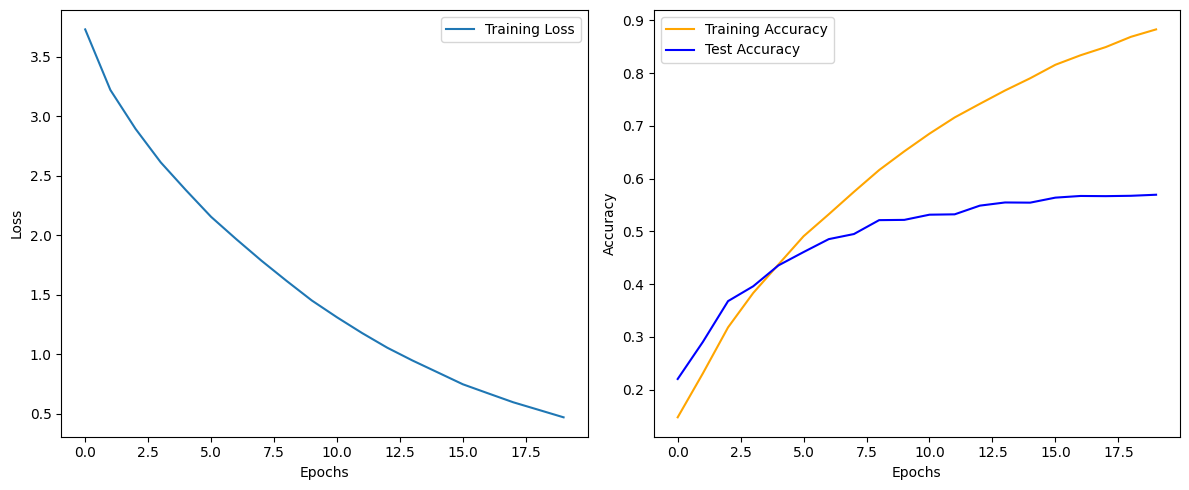

In [ ]:
import matplotlib.pyplot as plt

# Plot training loss and accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss_list, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_list, label='Training Accuracy', color='orange')
plt.plot(test_accuracy_list, label='Test Accuracy', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


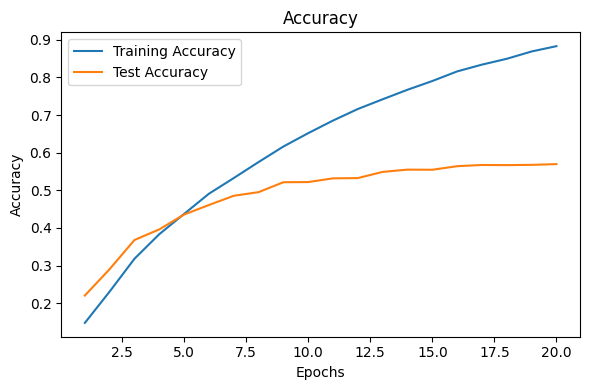

In [ ]:
import matplotlib.pyplot as plt

epochs_range = range(1, epochs + 1)

plt.figure(figsize=(6, 4))

# Plotting accuracy
plt.plot(epochs_range, train_accuracy_list, label='Training Accuracy')
plt.plot(epochs_range, test_accuracy_list, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Training Loss')

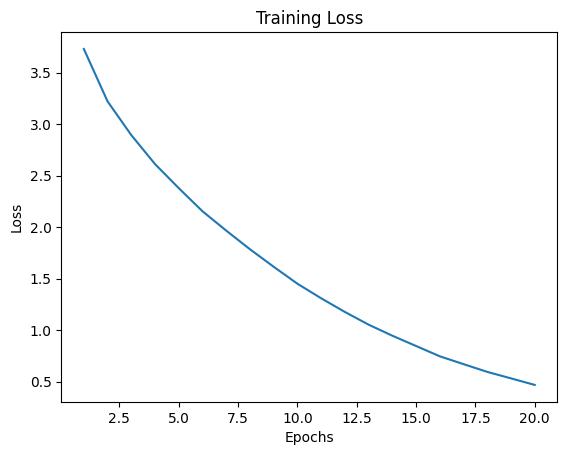

In [ ]:
# Plotting loss
plt.plot(epochs_range, train_loss_list, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')

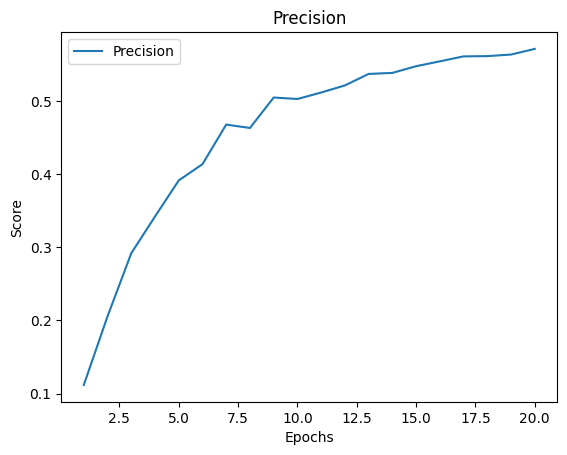

In [ ]:
# Plotting precision, recall, and F1-score
plt.plot(epochs_range, precision_list, label='Precision')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Precision')
plt.legend()




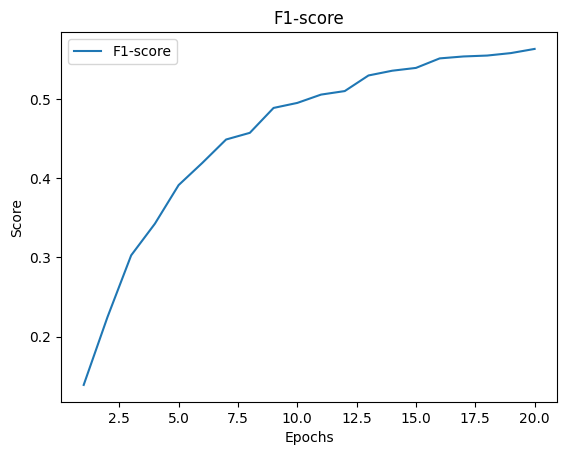

In [ ]:
plt.plot(epochs_range, f1_list, label='F1-score')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('F1-score')
plt.legend()

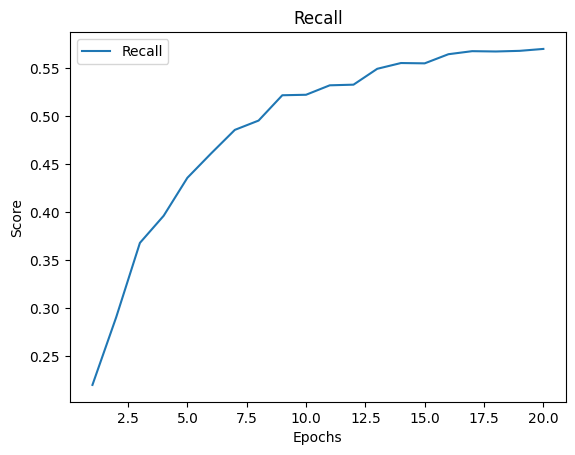

In [ ]:
plt.plot(epochs_range, recall_list, label='Recall')
plt.xlabel('Epochs')
plt.ylabel('Score')
plt.title('Recall')
plt.legend()

In [ ]:
#Evaluation and calculating accuracy
# Evaluation
# model.eval()
# predictions = []
# true_labels = []
# with torch.no_grad():
#     for batch in test_dataloader:
#         inputs, attention_mask, labels = batch
#         inputs, attention_mask, labels = inputs.to(device), attention_mask.to(device), labels.to(device)

#         outputs = model(inputs, attention_mask=attention_mask)[0]
#         _, predicted_labels = torch.max(outputs, 1)

#         predictions.extend(predicted_labels.cpu().numpy())
#         true_labels.extend(labels.cpu().numpy())

# # Calculate accuracy
# accuracy = accuracy_score(true_labels, predictions)
# print(f"Accuracy: {accuracy}")

# Model Staging


In [ ]:
# model = TFAutoModel.from_pretrained("bert-base-uncased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
# def tokenize(batch):
#     return tokenizer(batch["title"], padding=True, truncation=True)

In [ ]:
# text_encoded = combined_df.map(tokenize, batched=True, batch_size=None)

In [ ]:
# text_encoded

In [ ]:
# setting 'input_ids', 'attention_mask', 'token_type_ids', and 'label'
# to the tensorflow format. Now if you access this dataset you will get these
# columns in `tf.Tensor` format

# text_encoded.set_format('tf',
#                             columns=['input_ids', 'attention_mask', 'token_type_ids', 'label'])

# # setting BATCH_SIZE to 64.
# BATCH_SIZE = 64

# def order(inp):
#     '''
#     This function will group all the inputs of BERT
#     into a single dictionary and then output it with
#     labels.
#     '''
#     data = list(inp.values())
#     return {
#         'input_ids': data[1],
#         'attention_mask': data[2],
#         'token_type_ids': data[3]
#     }, data[0]

# # converting train split of `emotions_encoded` to tensorflow format
# train_dataset = tf.data.Dataset.from_tensor_slices(emotions_encoded['train'][:])
# # set batch_size and shuffle
# train_dataset = train_dataset.batch(BATCH_SIZE).shuffle(1000)
# # map the `order` function
# train_dataset = train_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

# # ... doing the same for test set ...
# test_dataset = tf.data.Dataset.from_tensor_slices(emotions_encoded['test'][:])
# test_dataset = test_dataset.batch(BATCH_SIZE)
# test_dataset = test_dataset.map(order, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
# inp, out = next(iter(train_dataset)) # a batch from train_dataset
# print(inp, '\n\n', out)

In [ ]:
# class BERTForClassification(tf.keras.Model):

#     def __init__(self, bert_model, num_classes):
#         super().__init__()
#         self.bert = bert_model
#         self.fc = tf.keras.layers.Dense(num_classes, activation='softmax')

#     def call(self, inputs):
#         x = self.bert(inputs)[1]
#         return self.fc(x)

In [ ]:
# classifier = BERTForClassification(model, num_classes=6)

# classifier.compile(
#     optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
#     loss=tf.keras.losses.SparseCategoricalCrossentropy(),
#     metrics=['accuracy']
# )

In [ ]:
# history = classifier.fit(
#     train_dataset,
#     epochs=3
# )

In [ ]:
# classifier.evaluate(test_dataset)

# Legacy Code

In [ ]:
# Training loop
# epochs = 20  # You can adjust this based on your needs
# print_every = 10  # Print output every 10 batches
# train_loss_list = []
# train_accuracy_list = []
# test_accuracy_list = []

# for epoch in range(epochs):
#     model.train()
#     total_loss = 0
#     correct_predictions = 0
#     total_samples = 0
#     start_time = time.time()

#     for batch_idx, batch in enumerate(train_dataloader):
#         inputs, attention_mask, labels = batch
#         inputs, attention_mask, labels = inputs.to(device), attention_mask.to(device), labels.to(device)

#         optimizer.zero_grad()
#         outputs = model(inputs, attention_mask=attention_mask)[0]
#         loss = criterion(outputs, labels)
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()
#         _, predicted_labels = torch.max(outputs, 1)
#         correct_predictions += (predicted_labels == labels).sum().item()
#         total_samples += labels.size(0)

#         if (batch_idx + 1) % print_every == 0 or (batch_idx + 1) == len(train_dataloader):
#             # Print training statistics every 10 batches or at the end of each epoch
#             avg_loss = total_loss / (batch_idx + 1)
#             avg_accuracy = correct_predictions / total_samples
#             current_time = time.time()
#             time_elapsed = current_time - start_time
#             print(f'Epoch {epoch + 1}/{epochs} - '
#                   f'Batch {batch_idx + 1}/{len(train_dataloader)} - '
#                   f'Average Loss: {avg_loss:.4f}, '
#                   f'Average Accuracy: {avg_accuracy:.4f}, '
#                   f'Time Elapsed: {time_elapsed:.2f} seconds')
#             start_time = time.time()

#     # Calculate training accuracy and loss for the epoch
#     train_accuracy = correct_predictions / total_samples
#     train_loss = total_loss / len(train_dataloader)
#     train_loss_list.append(train_loss)
#     train_accuracy_list.append(train_accuracy)

#     # Evaluate on the test set
#     model.eval()
#     predictions = []
#     true_labels = []
#     with torch.no_grad():
#         for batch in test_dataloader:
#             inputs, attention_mask, labels = batch
#             inputs, attention_mask, labels = inputs.to(device), attention_mask.to(device), labels.to(device)

#             outputs = model(inputs, attention_mask=attention_mask)[0]
#             _, predicted_labels = torch.max(outputs, 1)

#             predictions.extend(predicted_labels.cpu().numpy())
#             true_labels.extend(labels.cpu().numpy())

#     # Calculate test accuracy
#     test_accuracy = accuracy_score(true_labels, predictions)
#     test_accuracy_list.append(test_accuracy)

#     # Print training and test statistics for the epoch
#     print(f'Epoch {epoch + 1}/{epochs} - '
#           f'Train Loss: {train_loss:.4f}, '
#           f'Train Accuracy: {train_accuracy:.4f}, '
#           f'Test Accuracy: {test_accuracy:.4f}')
